In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import io
import requests
import numpy as np;
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
np.random.seed(0)
sns.set()
#pd.set_option("display.max_rows", None, "display.max_columns", None)


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Step1: Acquire data

In [3]:
#url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
#s=requests.get(url).content
#train_df=pd.read_csv(io.StringIO(s.decode('utf-8')))
train_df = pd.read_csv('./input/train.csv')

In [4]:
#train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')
combine = [train_df, test_df]

# Step2: Analyze the dataset

In [5]:
train_df.shape,test_df.shape

((891, 12), (418, 11))

In [6]:
train_df.columns.values, test_df.columns.values

(array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object),
 array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object))

# Observation:
Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

Continous: Age, Fare. Discrete: SibSp, Parch.

# Note:

sibsp: Number of Siblings/Spouses Aboard

parch: Number of Parents/Children Aboard

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# Observation:

Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

# Distribution of numerical feature

In [11]:
TotalPassenger= 2208 
TrainingSample= train_df.shape[0]
SamplePopulationPercent= (TrainingSample/TotalPassenger)*100
SamplePopulationPercent

40.35326086956522

In [12]:
train_df_temp = pd.DataFrame({'SibSp':train_df.SibSp })
sibsp_cnt=train_df_temp[train_df_temp.SibSp > 0].count()

PercentageSibSp= (sibsp_cnt/TrainingSample)*100
PercentageSibSp

SibSp    31.762065
dtype: float64

In [13]:
train_df_temp = pd.DataFrame({'Parch':train_df.Parch })
parch_cnt=train_df_temp[train_df_temp.Parch > 0].count()

PercentageParch= (parch_cnt/TrainingSample)*100
PercentageParch

Parch    23.905724
dtype: float64

In [14]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train_df.groupby(["Sex", "Age"])["Sex"].count()

Sex     Age  
female  0.75     2
        1.00     2
        2.00     6
        3.00     2
        4.00     5
                ..
male    70.00    2
        70.50    1
        71.00    2
        74.00    1
        80.00    1
Name: Sex, Length: 145, dtype: int64

# Distribution of numerical feature observation:

Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).

Survived is a categorical feature with 0 or 1 values.

Nearly 30% of the passengers had siblings and/or spouse aboard.

Fares varied significantly with few passengers (<1%) paying as high as $512.

Few elderly passengers (<1%) within age range 65-80 and no female passenger with age greater than 63

# Distribution of categorical feature

In [16]:
train_df['Name'].nunique()

891

In [17]:
train_df.groupby(["Sex"])["Sex"].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

In [18]:
TrainingSample= train_df.shape[0]
FemalePopulationPercent= (train_df.groupby(["Sex"])["Sex"].count()['female']/TrainingSample)*100
MalePopulationPercent= (train_df.groupby(["Sex"])["Sex"].count()['male']/TrainingSample)*100
FemalePopulationPercent,MalePopulationPercent

(35.24130190796858, 64.75869809203144)

In [19]:
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [20]:
train_df.groupby(["Cabin","PassengerId"])["PassengerId"].count()

Cabin  PassengerId
A10    584            1
A14    476            1
A16    557            1
A19    285            1
A20    600            1
                     ..
G6     11             1
       206            1
       252            1
       395            1
T      340            1
Name: PassengerId, Length: 204, dtype: int64

In [21]:
train_df.groupby(["Embarked"])["Embarked"].count().sort_values(ascending=False)

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
train_df.groupby(["Ticket"])["Ticket"].count().sort_values(ascending=False)

Ticket
CA. 2343    7
1601        7
347082      7
347088      6
CA 2144     6
           ..
PC 17601    1
349239      1
349240      1
349241      1
347464      1
Name: Ticket, Length: 681, dtype: int64

# Distribution of categorical feature observation:


Names are unique across the dataset (count=unique=891)

Sex variable as two possible values with 65% male (top=male, freq=577/count=891).

Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.

Embarked takes three possible values. S port used by most passengers (top=S)

Ticket feature has high ratio (22%) of duplicate values (unique=681).

# Analyze by pivoting features.

Analyzing feature correlations by pivoting features against each other.

At this stage can be done for features which do not have any empty values.
It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch)
type.

In [23]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [24]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [25]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [26]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Pivoting features observation:

Pclass significant correlation (>0.5) among Pclass=1 and Survived.

Sex Sex=female had very high survival rate at 74%.

Sibsp Sibsp=1, one sibling has high rate of survival at 54%

Parch Parch=1,2,3 one, two or three parch has high rate of survival at 54%

# Multivariate Analysis


# Analyze by visualizing data by Correlating numerical features


<Figure size 432x288 with 0 Axes>

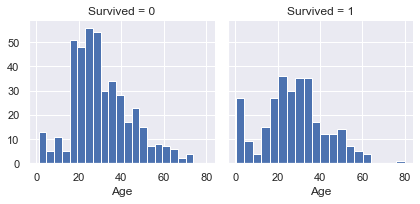

In [27]:
fig = plt.gcf()
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

# Analyze by visualizing data by Correlating numerical features

# Observations

Infants (Age <=4) had high survival rate.

Oldest passengers (Age = 80) survived.

Large number of 16-28 year olds did not survive.

Most passengers are in 16-40 age range.


# Decisions

We should consider Age in our model training.

Complete the Age feature for null values .

We should band age groups.

# Multivariate Analysis

# Correlating numerical and ordinal features

C:\Users\shivd\.conda\envs\MLProj\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


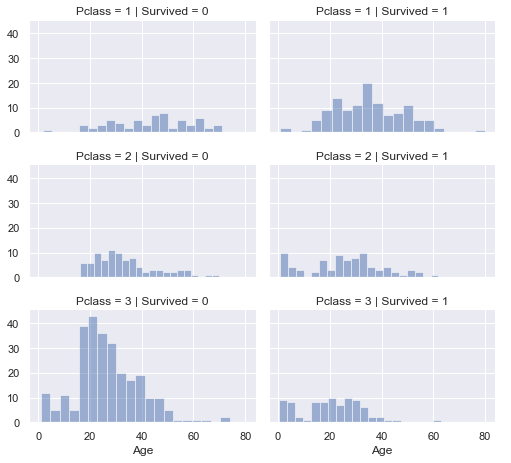

In [28]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Correlating numerical and ordinal features

# Observations


Pclass=3 had most passengers, however most did not survive

Infant passengers in Pclass=2 and Pclass=3 mostly survived.

Most passengers in Pclass=1 survived.

Pclass varies in terms of Age distribution of passengers.


# Decisions

Consider Pclass for model training.

# Multivariate Analysis

# Correlating categorical features

C:\Users\shivd\.conda\envs\MLProj\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\shivd\.conda\envs\MLProj\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


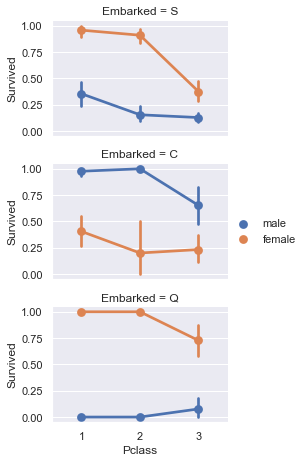

In [29]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

# Correlating categorical features


# Observations

Female passengers had much better survival rate than males.

Exception in Embarked=C where males had higher survival rate. 

This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.

Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.
Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.


# Decisions

Add Sex feature to model training.

Complete and add Embarked feature to model training.

# Multivariate Analysis


# Correlating categorical and numerical features


Combining multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

C:\Users\shivd\.conda\envs\MLProj\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\shivd\.conda\envs\MLProj\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


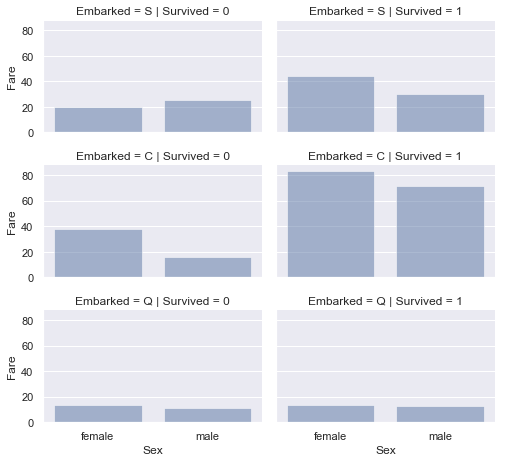

In [30]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# Correlating categorical and numerical features


# Observations

Pclass=3 had most passengers, however most did not survive

Infant passengers in Pclass=2 and Pclass=3 mostly survived.

Most passengers in Pclass=1 survived.

Pclass varies in terms of Age distribution of passengers.


# Decisions

Consider Pclass for model training.

# Multivariate Analysis


# Correlating categorical and numerical features

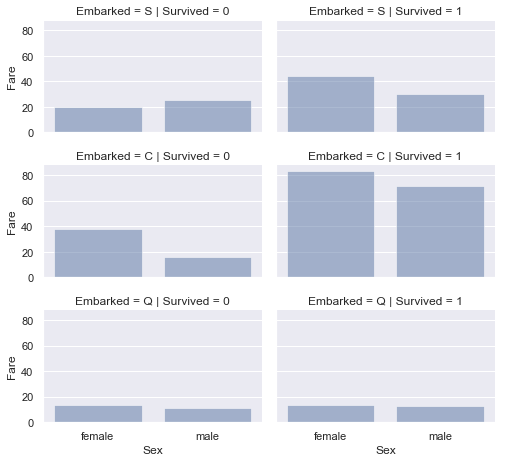

In [31]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# Correlating categorical and numerical features

# Observations
Higher fare paying passengers had better survival.
Port of embarkation correlates with survival rates.


# Decisions
Consider banding Fare feature.

# Data Preprocessing



# Feature dropping

In [32]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

# Creating new feature extracting from existing

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature.
The expand=False flag returns a DataFrame.

In [33]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


# Decisions
We can replace many titles with a more common name or classify them as Rare.

In [34]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


# Decisions
We can convert the categorical titles to ordinal.

In [35]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    #dataset['Title'] = dataset['Title'].map(title_mapping)
    #dataset['Title'] = dataset['Title'].fillna(0)
    
    dataset['Title'] = dataset['Title'].replace('Rare', '5')
    dataset['Title'] = dataset['Title'].replace('Master', '4')
    dataset['Title'] = dataset['Title'].replace('Mrs', '3')
    dataset['Title'] = dataset['Title'].replace('Miss', '2')
    dataset['Title'] = dataset['Title'].replace('Mr', '1')
    

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [36]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3


# Decisions
Now droping the Name feature from training and testing datasets and PassengerId feature in the training dataset.

In [37]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [38]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,5
887,1,1,female,19.0,0,0,30.0000,S,2
888,0,3,female,NaN,1,2,23.4500,S,2
889,1,1,male,26.0,0,0,30.0000,C,1


# Converting a categorical feature

# Decisions

Starting by converting Sex feature to a new feature called Gender where female=1 and male=0.

Embarked feature takes S, Q, C values based on port of embarkation.The Training dataset has two missing values. Simply filling these with the most common occurance.

In [39]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [40]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [41]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [42]:
#for dataset in combine:
#    dataset['Embarked'] = dataset['Embarked'].map( {'C': 0, 'Q': 1, 'S':2} ).astype(int)

# we will use get_dummies with that.
train_df_new=pd.get_dummies(train_df, columns=['Embarked'],drop_first=True)
train_df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,1,0,1
1,1,1,1,38.0,1,0,71.2833,3,0,0
2,1,3,1,26.0,0,0,7.9250,2,0,1
3,1,1,1,35.0,1,0,53.1000,3,0,1
4,0,3,0,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,5,0,1
887,1,1,1,19.0,0,0,30.0000,2,0,1
888,0,3,1,NaN,1,2,23.4500,2,0,1
889,1,1,0,26.0,0,0,30.0000,1,0,0


In [43]:
test_df_new=pd.get_dummies(test_df, columns=['Embarked'],drop_first=True)
test_df_new

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,1,1,0
1,893,3,1,47.0,1,0,7.0000,3,0,1
2,894,2,0,62.0,0,0,9.6875,1,1,0
3,895,3,0,27.0,0,0,8.6625,1,0,1
4,896,3,1,22.0,1,1,12.2875,3,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,NaN,0,0,8.0500,1,0,1
414,1306,1,1,39.0,0,0,108.9000,5,0,0
415,1307,3,0,38.5,0,0,7.2500,1,0,1
416,1308,3,0,NaN,0,0,8.0500,1,0,1


In [44]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,5
887,1,1,1,19.0,0,0,30.0000,S,2
888,0,3,1,NaN,1,2,23.4500,S,2
889,1,1,0,26.0,0,0,30.0000,C,1


# Imputing the null values


In [45]:
train_df_new.isna().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Title           0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [46]:
test_df_new.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Title           0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [47]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(train_df_new) # impute the missing values
#convert the nd-array returned in the step above to a Dataframe
train_new_data=pd.DataFrame(data=np.round(new_array), columns=train_df_new.columns)
train_new_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_Q,Embarked_S
0,0.0,3.0,0.0,22.0,1.0,0.0,7.0,1.0,0.0,1.0
1,1.0,1.0,1.0,38.0,1.0,0.0,71.0,3.0,0.0,0.0
2,1.0,3.0,1.0,26.0,0.0,0.0,8.0,2.0,0.0,1.0
3,1.0,1.0,1.0,35.0,1.0,0.0,53.0,3.0,0.0,1.0
4,0.0,3.0,0.0,35.0,0.0,0.0,8.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,27.0,0.0,0.0,13.0,5.0,0.0,1.0
887,1.0,1.0,1.0,19.0,0.0,0.0,30.0,2.0,0.0,1.0
888,0.0,3.0,1.0,15.0,1.0,2.0,23.0,2.0,0.0,1.0
889,1.0,1.0,0.0,26.0,0.0,0.0,30.0,1.0,0.0,0.0


In [68]:
train_new_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Title         0
Embarked_Q    0
Embarked_S    0
FamilySize    0
IsAlone       0
dtype: int64

In [69]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(test_df_new) # impute the missing values
#convert the nd-array returned in the step above to a Dataframe
test_new_data=pd.DataFrame(data=np.round(new_array), columns=test_df_new.columns)
test_new_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_Q,Embarked_S
0,892.0,3.0,0.0,34.0,0.0,0.0,8.0,1.0,1.0,0.0
1,893.0,3.0,1.0,47.0,1.0,0.0,7.0,3.0,0.0,1.0
2,894.0,2.0,0.0,62.0,0.0,0.0,10.0,1.0,1.0,0.0
3,895.0,3.0,0.0,27.0,0.0,0.0,9.0,1.0,0.0,1.0
4,896.0,3.0,1.0,22.0,1.0,1.0,12.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,1305.0,3.0,0.0,23.0,0.0,0.0,8.0,1.0,0.0,1.0
414,1306.0,1.0,1.0,39.0,0.0,0.0,109.0,5.0,0.0,0.0
415,1307.0,3.0,0.0,38.0,0.0,0.0,7.0,1.0,0.0,1.0
416,1308.0,3.0,0.0,23.0,0.0,0.0,8.0,1.0,0.0,1.0


In [70]:
test_new_data.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Title          0
Embarked_Q     0
Embarked_S     0
dtype: int64

All Imputation done.

In [51]:
combine_new = [train_new_data,test_new_data]

# Create new feature combining existing features

# Decision
Creating new feature for FamilySize = Parch + SibSp. to drop Parch and SibSp from our datasets.

In [52]:
for dataset in combine_new:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_new_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4.0,0.724138
2,3.0,0.578431
1,2.0,0.552795
6,7.0,0.333333
0,1.0,0.303538
4,5.0,0.200000
5,6.0,0.136364
7,8.0,0.000000
8,11.0,0.000000


# Decision

Creating another feature called IsAlone.

In [53]:
for dataset in combine_new:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_new_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


# Decision

Droping Parch, SibSp, and FamilySize features in favor of IsAlone.

In [54]:
train1_df = train_new_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test1_df = test_new_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine1 = [train1_df, test1_df]

train1_df

,Survived,Pclass,Sex,Age,Fare,Title,Embarked_Q,Embarked_S,IsAlone
0,0.0,3.0,0.0,22.0,7.0,1.0,0.0,1.0,0
1,1.0,1.0,1.0,38.0,71.0,3.0,0.0,0.0,0
2,1.0,3.0,1.0,26.0,8.0,2.0,0.0,1.0,1
3,1.0,1.0,1.0,35.0,53.0,3.0,0.0,1.0,0
4,0.0,3.0,0.0,35.0,8.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,27.0,13.0,5.0,0.0,1.0,1
887,1.0,1.0,1.0,19.0,30.0,2.0,0.0,1.0,1
888,0.0,3.0,1.0,15.0,23.0,2.0,0.0,1.0,0
889,1.0,1.0,0.0,26.0,30.0,1.0,0.0,0.0,1


In [55]:
test1_df

,PassengerId,Pclass,Sex,Age,Fare,Title,Embarked_Q,Embarked_S,IsAlone
0,892.0,3.0,0.0,34.0,8.0,1.0,1.0,0.0,1
1,893.0,3.0,1.0,47.0,7.0,3.0,0.0,1.0,0
2,894.0,2.0,0.0,62.0,10.0,1.0,1.0,0.0,1
3,895.0,3.0,0.0,27.0,9.0,1.0,0.0,1.0,1
4,896.0,3.0,1.0,22.0,12.0,3.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...
413,1305.0,3.0,0.0,23.0,8.0,1.0,0.0,1.0,1
414,1306.0,1.0,1.0,39.0,109.0,5.0,0.0,0.0,1
415,1307.0,3.0,0.0,38.0,7.0,1.0,0.0,1.0,1
416,1308.0,3.0,0.0,23.0,8.0,1.0,0.0,1.0,1


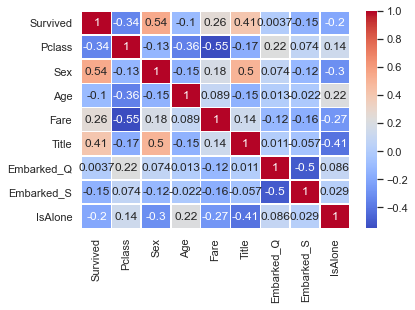

In [56]:
ax = sns.heatmap(train1_df.corr(),annot=True,linewidth=0.5, cmap='coolwarm')

# Decision
There is  positive correlation between Gender and Survived.
There is  positive correlation between Title and Survived.

There is  negative correlation between PClass and Fare.

We will further investigate using VIF.

# Distribution for our continous data in the dataset:

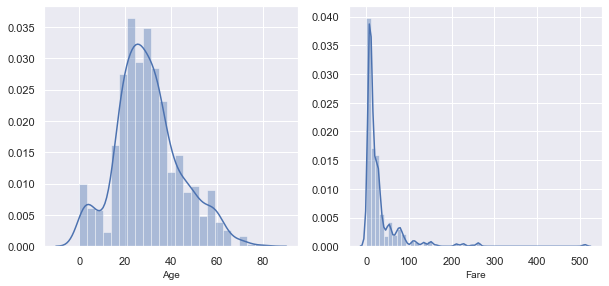

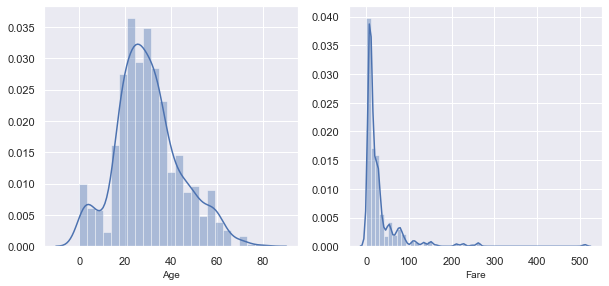

In [57]:
columns = ['Age','Fare']
plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(train1_df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()
plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(train1_df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Before doing log transformation , let's add 1 to each valuue in the column to handle exception when we try to find log of '0'.

Age seems to follow Gaussian whereas Fare is heavily left skewed

<Figure size 720x1080 with 0 Axes>

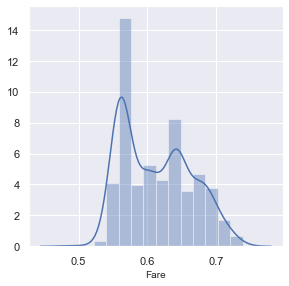

In [75]:
columns = ['Fare']
       
plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    train1_df[column]+=1
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(np.log(train1_df[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [78]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(train1_df) # impute the missing values
#convert the nd-array returned in the step above to a Dataframe
train1_df=pd.DataFrame(data=np.round(new_array), columns=train1_df.columns)
train1_df

train1_df.isna().sum(),test1_df.isna().sum()

(Survived      0
 Pclass        0
 Sex           0
 Age           0
 Title         0
 Embarked_Q    0
 Embarked_S    0
 IsAlone       0
 Fare          0
 dtype: int64,
 PassengerId    0
 Pclass         0
 Sex            0
 Age            0
 Fare           0
 Title          0
 Embarked_Q     0
 Embarked_S     0
 IsAlone        0
 dtype: int64)

In [81]:
train1_df.head()

,Survived,Pclass,Sex,Age,Title,Embarked_Q,Embarked_S,IsAlone,Fare
0,0.0,3.0,0.0,22.0,1.0,0.0,1.0,0.0,2.0
1,1.0,1.0,1.0,38.0,3.0,0.0,0.0,0.0,2.0
2,1.0,3.0,1.0,26.0,2.0,0.0,1.0,1.0,2.0
3,1.0,1.0,1.0,35.0,3.0,0.0,1.0,0.0,2.0
4,0.0,3.0,0.0,35.0,1.0,0.0,1.0,1.0,2.0


In [82]:
scaler =StandardScaler()
X_scaled = scaler.fit_transform(train1_df.drop("Survived", axis=1))

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = train1_df.drop("Survived", axis=1).columns
vif

C:\Users\shivd\.conda\envs\MLProj\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF,Features
0,1.405822,Pclass
1,1.396790,Sex
2,1.304966,Age
3,1.505422,Title
4,1.507480,Embarked_Q
5,1.411892,Embarked_S
6,1.286581,IsAlone
7,NaN,Fare


# Decision
As we see the vif of all columns are less than 5, therefore there is no multicollinearity

# Check for Imbalance Dataset

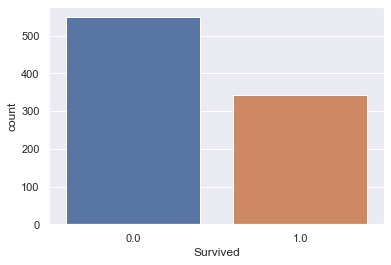

In [84]:
sns.countplot(train1_df['Survived'])

In [85]:
X_train = train1_df.drop("Survived", axis=1)
Y_train = train1_df["Survived"]
X_test  = test1_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape,X_train.shape
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_sample(X_train,Y_train)

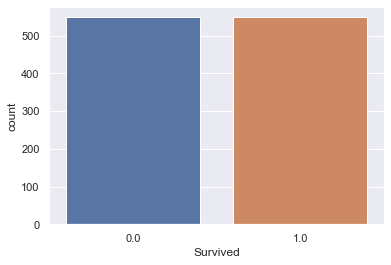

In [86]:
y_sampled_temp = pd.DataFrame(y_sampled, columns = ['Survived']) 
sns.countplot(y_sampled_temp['Survived'])

# Decision
The dataset got balanced using RandomOverSampler.

# ML Training and Prediction


KNN or k-Nearest Neighbors

Support Vector Machines

Naive Bayes classifier

Decision Tree

Random Forrest

In [87]:
#X_train = train1_df.drop("Survived", axis=1)
#Y_train = train1_df["Survived"]
X_test  = test1_df.drop("PassengerId", axis=1).copy()
x_sampled.shape, y_sampled.shape, X_test.shape

((1098, 8), (1098,), (418, 8))

# Decision Tree

In [88]:
decision_tree = DecisionTreeClassifier()
#decision_tree.fit(X_train, Y_train)
decision_tree.fit(x_sampled,y_sampled)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(x_sampled,y_sampled) * 100, 2)
acc_decision_tree

92.81

In [89]:
submission = pd.DataFrame({
        "PassengerId": test_new_data["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('./output/submission.csv', index=False)

# Support Vector Machines

In [90]:
# Support Vector Machines

svc = SVC()
svc.fit(x_sampled,y_sampled)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(x_sampled,y_sampled) * 100, 2)
acc_svc

76.96

# k-Nearest Neighbors algorithm

In [91]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_sampled,y_sampled)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(x_sampled,y_sampled) * 100, 2)
acc_knn

87.89

# Naive Bayes classifiers

In [92]:

gaussian = GaussianNB()
gaussian.fit(x_sampled,y_sampled)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(x_sampled,y_sampled) * 100, 2)
acc_gaussian

77.41

# Random Forests

In [93]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_sampled,y_sampled)
Y_pred = random_forest.predict(X_test)
random_forest.score(x_sampled,y_sampled)
acc_random_forest = round(random_forest.score(x_sampled,y_sampled) * 100, 2)
acc_random_forest

92.81

# Model evaluation

In [94]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN',  
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,92.81
4,Decision Tree,92.81
1,KNN,87.89
3,Naive Bayes,77.41
0,Support Vector Machines,76.96
